<a href="https://colab.research.google.com/github/kareem1925/Ismailia-school-of-AI/blob/master/universal_qubit_classifier_using_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universal Qubit Classifier Using Quantum Gradient Descent**

###### This Notebook's purpose is to introduce machine learning developers or researchers to the Quantum Machine Learning (QML) field.

## **Introduction**

First of all, there is no need to have a solid quantum physics background to go through this notebook. It would, of course, be helpful but little to no experience is assumed. However, a solid knowledge of **algebra**, some **calculus**, **trigonometry**, **programming**, and some **machine learning experience** are extremly important.

Throughout the notebook, there will be some reference links that describe some notions or show the origins of a specific assumption. You are advised to follow them if by any chance you feel little uncomfortable with what you read. It's safe to say that in this notebook you may find most of the answers that you are looking for or at least a doorway for them.

### Environement Setup:
Google Colab does provide everything we need in this tutorial but if you want to try this on your machine then a working version of Python 3.5 or higher would be great. Running the following command line will setup everything for us

> pip install qiskit --upgrade

Some linux machines may require a sudo previlage, so you should pay some intension to that. To make sure everything is working perfect check the output of the following code in a jupyter notebook:

```
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright
```
It should print out the current qiskit version which is 0.11.1 and also the other accompanying libraries. If you want to print out the version in a normal ipython terminal then copy the follwing code:

```
import qiskit
print(qiskit.__version__)
```

Let's first execute the first cell to install the necessary packages on colab.

In [1]:
!pip install qiskit -q --upgrade

import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

     |████████████████████████████████| 2.7MB 3.5MB/s 
     |████████████████████████████████| 18.2MB 164kB/s 
     |████████████████████████████████| 92kB 11.6MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 1.4MB 55.1MB/s 
     |████████████████████████████████| 5.6MB 54.0MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 573kB 47.9MB/s 
     |████████████████████████████████| 24.3MB 109kB/s 
     |████████████████████████████████| 2.3MB 53.5MB/s 


By now, you may be wondering about [Qiskit](https://qiskit.org/). Well, it may appear to you as a normal python package that presents some tools for quantum programming. You're not entirely wrong about that. However, it's IBM's main framework for quantum computing. This means that it gives you the required means to control actual quantum computers, calibrate the errors that may occur during executing any circuit, build different quantum algorithms, and of course visualise most of them. It's safe to say that It's a full stack framework where both Hardware and Software quantum developers are working together. You may find all the details you want on their online website.

## **Problem Definition**

The probelm is simply a binary classification task but with a non-linear sepearable dataset. This dataset is chosen to show that the quantum algorithm used for this tutorial is good enough to tackle similar problems easily. The following cell imports the required libraries to plot the dataset.

shape of the training & testing data:  (810, 2) (90, 2)


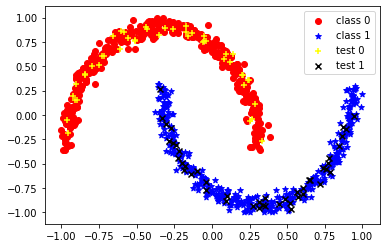

number of samples for testing class_1:  45
number of samples for testing class_0:  45


In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt

n_samples = 900
test_size = 0.1

data,labels = make_moons(n_samples=n_samples,random_state=5,noise=0.04) 

#splitting the data evenly
x_train,x_test,y_train,y_test = train_test_split(data,labels,stratify=labels,test_size=test_size,random_state=0)

#preprocessing
scale = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

print('shape of the training & testing data: ', x_train.shape, x_test.shape)

#simple plotting
plt.scatter(x_train[:,0][y_train==0], x_train[:,1][y_train==0], marker='o', 
            color='red', label='class 0')
plt.scatter(x_train[:,0][y_train==1], x_train[:,1][y_train==1], marker='*', 
            color='blue', label='class 1')
plt.scatter(x_test[:,0][y_test==0], x_test[:,1][y_test==0], marker='+', 
            color='yellow', label='test 0')
plt.scatter(x_test[:,0][y_test==1], x_test[:,1][y_test==1], marker='x', 
            color='black', label='test 1')

plt.legend()
plt.show()

print("number of samples for testing class_1: ",(y_test==1).sum())
print("number of samples for testing class_0: ",(y_test==0).sum())

The dataset consists of *810* samples for training and *90* samples for testing. They are distributed equally and also scaled between [-1,1]. The typical way to handle such dataset is to use the [Support Vector Machine](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf), [SVM with scikit-learn](https://scikit-learn.org/stable/modules/svm.html), and [SVM with QISKIT](https://iwatobipen.wordpress.com/2019/07/07/svm-on-quantum-computing-quantumcomputing-qiskit/) .

I do urge you to check the first two links if you are not familiar with it. The third link is a direct implementation of quantum SVM algorithm using qiskit-aqua. You may want to check it after finishing this tutorial or if you already familiar with both quantum computing and machine learning then go ahead and open it.

The following code with show you how the svm can solve this problem easily:


In [13]:
from sklearn.svm import SVC
import numpy as np

model = SVC(kernel = 'rbf', gamma = 'scale', C = 1, random_state = 0)

model.fit(x_train,y_train)

print("accuracy of testing is: ", model.score(x_test,y_test))

accuracy of testing is:  1.0


**plotting the decision boundary**


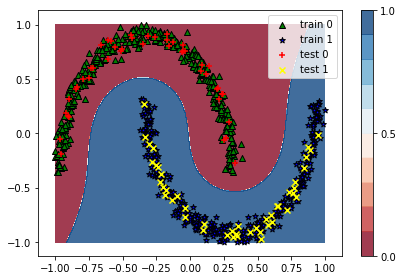

[27 27]


In [22]:
#creating the surface
xx, yy = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-1, 1, 500))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]
predictions_grid = model.predict(X_grid)
Z = np.reshape(np.array(predictions_grid), xx.shape)

cm = plt.cm.RdBu

cnt = plt.contourf(xx, yy, Z, levels=np.arange(0., 1.1, 0.1), cmap=cm, alpha=.8)

plt.colorbar(cnt, ticks=[0, 0.5, 1])

plt.scatter(x_train[:, 0][y_train==0], x_train[:, 1][y_train==0], c='g',
            marker='^', edgecolors='k',label='train 0')
plt.scatter(x_train[:, 0][y_train==1], x_train[:, 1][y_train==1], c='b',
            marker='*', edgecolors='k',label='train 1')
plt.scatter(x_test[:, 0][y_test==0], x_test[:, 1][y_test==0], c='r',
            marker='+', edgecolors='k',label='test 0')
plt.scatter(x_test[:, 0][y_test==1], x_test[:, 1][y_test==1], c='yellow',
            marker='x', edgecolors='k',label='test 1')

plt.ylim(-1.07, 1.07)
plt.xlim(-1.07, 1.07)

plt.legend()
plt.tight_layout()
plt.show()
print(model.n_support_)

 **Voila!** you've done it. Then why bother doing the same thing but in a quantum way. You may find some answers to this question but most of them wouldn't be encourging from a business point of view because you already do have an efficient, fast, and clean way. On the other hand, considering real world scenarios, Neural Networks play the most important and vital role in both academia and industry.

The most reasonable answer for this question is a small history lesson. 15 years ago this [paper](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf) was the true state of the art, the hype and the coolest thing to use for detecting objects and of course recognising them. It used only a ***Linear Kernel*** for the SVM. After 4 to 5 years GPUs started to be affordable to everyone and this simply led to using them for very complex algebric computations. 

As a natural consequence this [paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) by Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton has officially started the deep learning era. However in 1998 this [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner, has actually presented a very promising convolutional neural network for recognising handwritten english numbers aka the mnist dataset. But it was incredibly hard to use this wonderful and novel architecture with the available hardware back then.

In the next 15 to 20 years from now, Quantum Computers would be more powerful, immune to noise, and most importantly essential for us to move on to the next step of solving classically intractable problems as shown in the following figure:

![alt text](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-845-quantum-complexity-theory-fall-2010/6-845f10.jpg) 

It's taken from this great [course form MIT](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-845-quantum-complexity-theory-fall-2010/) about Complexity Theory taughy by Prof. Scott Aaronson. 

Quantum Computation is the natural evolution of the information processing industry and whether you agree or disagree with that it's happening. Let's start introducing some important concepts regarding quantum computing.

In [0]:
Quantum 

In [0]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import *
from qiskit.quantum_info.analysis import average_data
from qiskit.quantum_info import state_fidelity
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
import numpy as np
from tqdm import tqdm 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt

In [0]:
n_qubits = 2
layers = 5
n_samples = 800

In [0]:
def cerate_data(n_qubits,layers,dataset_name,n_samples,test_size = 0.1,plot=True,normalize=True):

  """
  this fucntion takes 4 main inputs:
  n_qubits: int 1,....,n
  layers: int 1,....,n
  dataset_name: str like 'moons'
  n_samples: int 2,......,n
  test_size: float between 0 and 1

  it returns the training and the testing dataset with their labels and also the 
  corrosponding target states and also the weights for training the classifier
  """

  # creating circles dataset taken from: https://github.com/AdrianPerezSalinas/universal_qlassifier/blob/master/data_gen.py

  def _circle(n_samples):
    centers = np.array([[0, 0]])
    radii = np.array([np.sqrt(1.8/np.pi)])
    data=[]
    dim = 2
    labels=[]
    np.random.seed(1000)
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        y = 0
        for c, r in zip(centers, radii):  
            if np.linalg.norm(x - c) < r:
                y = 1 

        data.append(x)
        labels.append(y)
            
    return np.array(data), np.array(labels)

  if dataset_name.lower() == 'moons':
    data,labels = make_moons(n_samples=n_samples,random_state=5,noise=0.04)
  
  if dataset_name.lower() == 'circles':
    data,labels = _circle(n_samples)

  x_train,x_test,y_train,y_test = train_test_split(data,labels,stratify=labels,test_size=test_size,random_state=0) # splitting data evenly

  if normalize: # scale features  [-1:1]

    if len(x_train.shape) == 1: #check for dimension to prevent any error from scaling
      x_train = x_train.reshape(-1,1)
      x_test = x_test.reshape(-1,1)

    scale = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
    x_train = scale.transform(x_train)
    x_test = scale.transform(x_test)
  
  #check features' dimensions and make it 3 or its multiples
  if len(x_train)<3 or len(x_train) > 6:

    if x_train.shape[1] == 2:

      x_train = np.hstack((x_train,np.zeros(len(x_train)).reshape(-1,1)))
      x_test = np.hstack((x_test,np.zeros(len(x_test)).reshape(-1,1)))

    if x_train.shape[1] == 1:
      
      x_train = np.hstack((x_train,np.zeros(len(x_train)).reshape(-1,1),np.zeros(len(x_train)).reshape(-1,1)))
      x_test = np.hstack((x_test,np.zeros(len(x_test)).reshape(-1,1),np.zeros(len(x_test)).reshape(-1,1)))
    
    if x_train.shape[1] == 4:
      
      x_train = np.hstack((x_train,np.zeros(len(x_train)).reshape(-1,1),np.zeros(len(x_train)).reshape(-1,1)))
      x_test = np.hstack((x_test,np.zeros(len(x_test)).reshape(-1,1),np.zeros(len(x_test)).reshape(-1,1)))

    if x_train.shape[1] == 5:

      x_train = np.hstack((x_train,np.zeros(len(x_train)).reshape(-1,1)))
      x_test = np.hstack((x_test,np.zeros(len(x_test)).reshape(-1,1)))
    if x_train.shape[1] > 6:
      raise ValueError("please create a dataset whose number of features are divisible by 3 as there is no checking mechanisim implemented for values bigger than 6")

  # prepare target states based on number of labels, currently only two-label is implemented

  n_of_labels = len(np.unique(labels))

  state_labels = np.zeros((n_of_labels,2**n_qubits),dtype=np.complex128)

  if n_of_labels == 2:
    state_labels[0,0] = 1
    if n_qubits > 1:
      state_labels[-1] = -1/np.sqrt(2)
    else:
      state_labels[-1,-1] = 1


  # initialize weights  
  np.random.seed(100) #to make results reproducible
  weights = np.random.rand(n_qubits,layers,3)
  
  if plot:
    plt.scatter(x_train[:,0][y_train==0], x_train[:,1][y_train==0], marker='o', 
                color='red', label='class 0')
    plt.scatter(x_train[:,0][y_train==1], x_train[:,1][y_train==1], marker='*', 
                color='blue', label='class 1')
    plt.legend()
    plt.show()

  return (x_train,y_train),(x_test,y_test),state_labels,weights


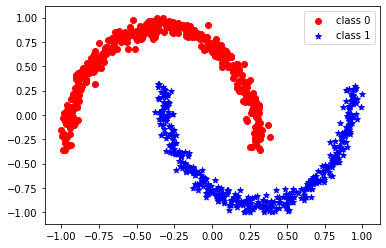

In [0]:
(x_train,y_train),(x_test,y_test),State_labels,params = cerate_data(1,6,'moons',900,test_size=0.1)

In [0]:
State_labels[0],x_train.shape,params

(array([1.+0.j, 0.+0.j]),
 (90, 3),
 array([[[0.54340494, 0.27836939, 0.42451759],
         [0.84477613, 0.00471886, 0.12156912],
         [0.67074908, 0.82585276, 0.13670659],
         [0.57509333, 0.89132195, 0.20920212],
         [0.18532822, 0.10837689, 0.21969749],
         [0.97862378, 0.81168315, 0.17194101]]]))

In [0]:
def circuit(params,X,State_labels=State_labels):

    """

    this function takes 3 inputs:

    params: array like that determines the number of qubits and the number of layers
    X: a single sample that contains the features
    State_labels: are the target states created from create_data()    
    it returns the fidelities from the two target states in a list

    """


    
    n_qubits = len(params)
    layers = len(params[0])
    qc = QuantumCircuit(n_qubits)
    
    n_features = len(X)

    for layer in range(layers):
        
        for qubit in range(n_qubits):
           
            for index in range(0,n_features,3):
              qc.u3(X[index],X[index+1],X[index+2],qubit)
              
            qc.u3(params[qubit][layer][0],params[qubit][layer][1],params[qubit][layer][2],qubit)
            
        if n_qubits > 1 and (layer < layers-1):
          qc.cz(0,1)
                
    backend_sim = Aer.get_backend('statevector_simulator')

    job_sim = execute(qc, backend_sim)

    result_sim = job_sim.result()
    
    state_vector = result_sim.get_statevector(qc)
    fid_1 = state_fidelity(state_vector,State_labels[0])
    fid_2 = state_fidelity(state_vector,State_labels[1])
    #print(average_data(counts,vals))
    return [fid_1,fid_2]

In [0]:
def cost(params,X,y,State_labels):
    """
    params: array like that determines the number of qubits and the number of layers
    
    X: samples that contain the features
    
    y: are the labels for that sample    

    State_labels: are the target states created from create_data()

    this function returns the binary cross entropy cost from the computed fidelities and corresponding labels
    """
    value = []
    
    for i in range(len(X)):
        value.append(circuit(params,X[i],State_labels))

    res = log_loss(y,value,labels=y_train)
   # print(res)
    return res
        

In [0]:
def gradient(params,x,y,State_labels):
    """
    this function computes the gradients for each varaible in the quantum circuit
    it takes:
    x: a single sample
    y: the corresponding label
    State_labels: are the target states created from create_data()
    """
    g = np.zeros(params.shape)
    
    for qubit in range(len(params)):
        
        for layer in range(len(params[qubit])):
            
            for val in range(len(params[qubit][layer])):
                
        
                params[qubit][layer][val] = params[qubit][layer][val]+np.pi/2
                
                F1 = cost(params,x,y,State_labels)
                
                params[qubit][layer][val] = params[qubit][layer][val]-np.pi/2
                
                
                params[qubit][layer][val] = params[qubit][layer][val]-np.pi/2
    
                F2 = cost(params,x,y,State_labels)
                
                params[qubit][layer][val] = params[qubit][layer][val]+np.pi/2
                
                g[qubit][layer][val] = (F1-F2)/2
    return g

In [0]:
def optimize(params,X,y,lr,State_labels):
    
    g = gradient(params,X,y,State_labels)
    
    new_weights = params - (lr*g)
    
    return new_weights

In [0]:
def predict(params,X):

    """
    this function takes only the weights "params" and a single sample from the data

    it returns a continous output ranging from 0 to 1. this requires rounding the output

    """

    fid_1,fid_2 = circuit(params,X)


    if fid_1 > fid_2:
      
      return abs(1-fid_1)
    
    else:

      return fid_2
    

In [0]:
np.random.seed(100) #to be reproducible 
#params = np.random.rand(1,6,3)
weights = params
loss = np.inf
lr = 0.22
test_loss = []
epochs = 500
batch_size = 20

for it in range(epochs):


    # create random indices every iteration "stochastic gradient descent way not mini batch because of long time" 
    index = np.random.randint(0,len(x_train),batch_size)
    x_batch,y_batch = x_train[index],y_train[index]
    # if you want to decay lr uncomment the following and edit it the way you want 
    #if i+1 == 500 or i+1 == 800:
     #   lr = lr - 0.05
    weights = optimize(weights,x_batch,y_batch,lr,State_labels)
    
    res = cost(weights,x_test,y_test,State_labels)
    test_loss.append(res)

    # save best weights based on testing portion of the data    
    if res < loss:
        loss = res
        var = weights
    print(
        "Epoch: {:2d} | testing loss: {:4f}".format(it+1,res))

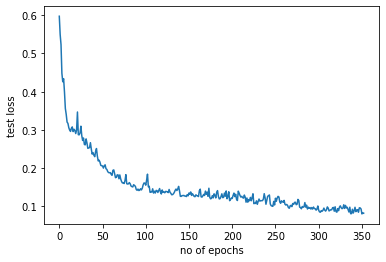

In [0]:
plt.xlabel('no of epochs')
plt.ylabel('test loss')
plt.plot(range(len(test_loss)),test_loss)
plt.show()

In [0]:
r = np.load('best-weights.npy')
#print(var.shape)
pred = []
for j in range(len(x_train)):
    pred.append(predict(r,x_train[j]))


In [0]:
print(accuracy_score(np.array(pred).round(),y_train))
print(classification_report(np.array(pred).round(),y_train))

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       405
         1.0       1.00      1.00      1.00       405

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



In [0]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]
X_grid = np.hstack((X_grid,np.zeros(len(X_grid)).reshape(-1,1)))
predictions_grid = [predict(r, x) for x in X_grid]

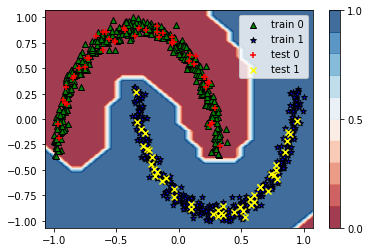

In [0]:
Z = np.reshape(np.array(predictions_grid).round(), xx.shape)
cm = plt.cm.RdBu
cnt = plt.contourf(xx, yy, Z, levels=np.arange(0., 1.1, 0.1), cmap=cm, alpha=.8)
plt.colorbar(cnt, ticks=[0, 0.5, 1])
plt.scatter(x_train[:, 0][y_train==0], x_train[:, 1][y_train==0], c='g', marker='^', edgecolors='k',label='train 0')
plt.scatter(x_train[:, 0][y_train==1], x_train[:, 1][y_train==1], c='b', marker='*', edgecolors='k',label='train 1')
plt.scatter(x_test[:, 0][y_test==0], x_test[:, 1][y_test==0], c='r', marker='+', edgecolors='k',label='test 0')
plt.scatter(x_test[:, 0][y_test==1], x_test[:, 1][y_test==1], c='yellow', marker='x', edgecolors='k',label='test 1')

plt.ylim(-1.07, 1.07)
plt.xlim(-1.07, 1.07)
plt.legend()
plt.savefig('decision_b.png',dpi=700)
plt.show()


In [0]:
var[0][0]

array([1.13449496, 0.28881491, 1.41365572])

In [0]:
for i in range(len(var)):
  for id,j in enumerate(params[i]):
    print(id)
    print(j)

0
[0.8734294  0.96854066 0.86919454]
1
[0.53085569 0.23272833 0.0113988 ]
2
[0.43046882 0.40235136 0.52267467]
3
[0.4783918  0.55535647 0.54338602]
4
[0.76089558 0.71237457 0.6196821 ]
5
[0.42609177 0.28907503 0.97385524]


In [0]:
for layer in range(len(var[0])):
  for qubit in range(1):
    print(var[qubit][layer])

[1.13449496 0.28881491 1.41365572]
[ 1.04005053  1.11646599 -1.71870497]
[ 0.23246252 -0.40714122  0.48893466]
[ 1.21158487  0.71205549 -0.76677812]
[ 2.46779094 -0.92909167 -0.34517346]
[-0.45782809  0.81168315 -0.0658338 ]


In [0]:
len(params[0])

6

In [0]:
var

array([[[ 1.13449496,  0.28881491,  1.41365572],
        [ 1.04005053,  1.11646599, -1.71870497],
        [ 0.23246252, -0.40714122,  0.48893466],
        [ 1.21158487,  0.71205549, -0.76677812],
        [ 2.46779094, -0.92909167, -0.34517346],
        [-0.45782809,  0.81168315, -0.0658338 ]]])

In [0]:
test_loss

[0.5971723090757349,
 0.5496168490632055,
 0.5228793776906644,
 0.4481700718755274,
 0.4259143512812901,
 0.4338913770376808,
 0.399064382826905,
 0.3560950742042638,
 0.34068588020717994,
 0.3205501513002052,
 0.3170218071577454,
 0.30577690370054356,
 0.2995499017989972,
 0.296073343045529,
 0.304508933326127,
 0.3078449351325675,
 0.29564468903901464,
 0.30183786999918294,
 0.2987986301993505,
 0.2904842366639304,
 0.29971737352012445,
 0.3468285702035683,
 0.2875251600126019,
 0.28722681517290816,
 0.2922463048330996,
 0.3097253075161831,
 0.2848941122400038,
 0.27244926174127915,
 0.27881976043449924,
 0.261976703499792,
 0.26095379696508336,
 0.2765577200767797,
 0.26587061457565075,
 0.2518692992677928,
 0.25278524084444304,
 0.25373166615231246,
 0.26662136282969345,
 0.2501264985893572,
 0.2368209776770082,
 0.2406497889613525,
 0.23388319848477196,
 0.23002918401960315,
 0.24376473863939546,
 0.2513305437298866,
 0.23169997343751825,
 0.21893981554871272,
 0.22091703867460283

In [12]:
model.predict_proba(X_grid)

array([[0.47346711, 0.52653289],
       [0.47446706, 0.52553294],
       [0.47546226, 0.52453774],
       ...,
       [0.46348648, 0.53651352],
       [0.46440053, 0.53559947],
       [0.46529264, 0.53470736]])